In [1]:
import sys                       
sys.path.append('./LNPR/scripts/')
from robot import *
from matplotlib.patches import Rectangle

In [2]:
class Wall:
    def __init__(self, x, y, angle, length=1.0, thickness=0.1):
        self.pose = np.array([x, y, angle]).T
        self.length = length
        self.thickness = thickness
        self.id = None
        
    def draw(self, ax, elems):
        x, y, a = self.pose        
        r = Rectangle([x,y], self.length, self.thickness, angle=a/np.pi*180, color="green")
        ax.add_patch(r)

In [3]:
class IdealLidar(IdealCamera):
    def __init__(self, env_map, distance_range=(0.5, 6.0), direction_range=(-math.pi/3, math.pi/3)):
        super().__init__(env_map, distance_range, direction_range)

In [4]:
class WallMap(Map):
    def __init__(self):
        super().__init__()
        self.walls = []

    def append_wall(self, wall):
        wall.id = len(self.walls)
        self.walls.append(wall)

    def draw(self, ax, elems):
        super().draw(ax, elems)
        for w in self.walls: w.draw(ax, elems)

<IPython.core.display.Javascript object>


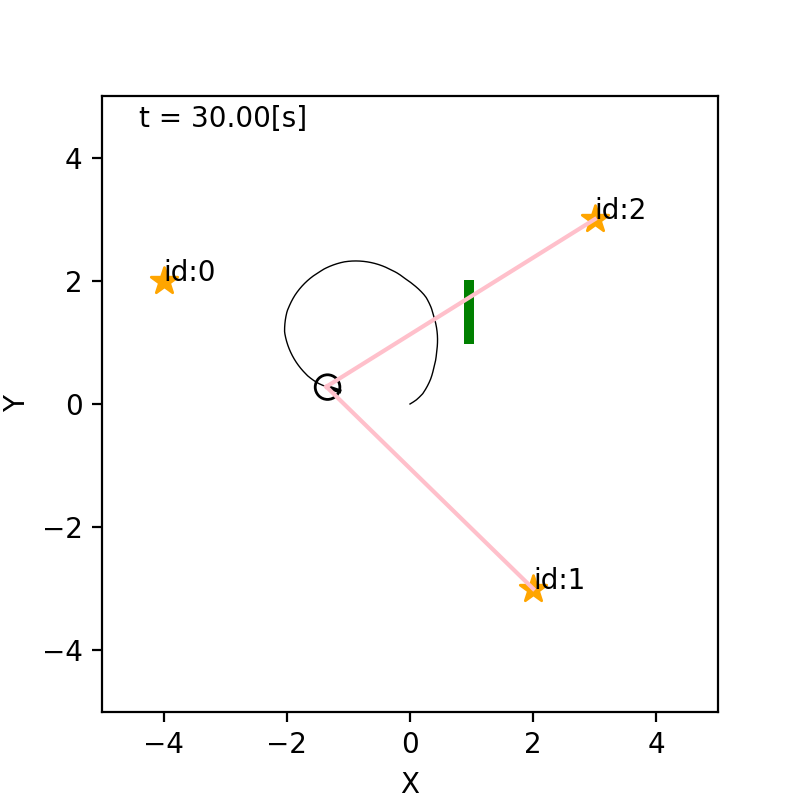

In [5]:
if __name__ == '__main__': 
    world = World(30, 0.1, debug=False)  

    ### 地図を生成して3つランドマークを追加 ###
    m = WallMap()                                  
    m.append_landmark(Landmark(-4,2))
    m.append_landmark(Landmark(2,-3))
    m.append_landmark(Landmark(3,3))
    world.append(m)          
    
    m.append_wall(Wall(1,1, np.pi/2))

    ### ロボットを作る ###
    straight = Agent(0.2, 0.0)    
    circling = Agent(0.2, 10.0/180*math.pi)  
    r = Robot( np.array([ 0, 0, math.pi/6]).T, sensor=IdealLidar(m), agent=circling) 
    world.append(r)

    ### アニメーション実行 ###
    world.draw()